In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
absor1 = pd.read_csv('/Users/huihaoz/Downloads/GeometricA_Earth_HighCloud_UltraRes1.dat', comment = '#', delimiter='\s+')
absor2 = pd.read_csv('/Users/huihaoz/Downloads/mktrans_zmnq_16_15.dat', comment = '#', delimiter='\s+')
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES.txt', sep=',')
pts["Teq"] = (pts.STK * ((pts.SRadiusSun *  const.R_sun/(2*pts.SMAAU * const.au)))**(1/2) * (1-0.3)**(0.25))
pts.iloc[0,8]=181.7
pts.iloc[3,8]=351
pts.iloc[9,8]=468
pts.iloc[11,8]=301
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*2*5
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*2*5
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
alb_nogas = np.interp(absor1.nm/1000,wl_fit_non,np.array(pn_fit_non))
wl_um2 = np.array(absor1.nm[:1079300])/1000 * u.um
my_list_norabd = (absor1.totalb / alb_nogas) #normalized abd

# Iterate over the list and replace any value greater than 1 with 1
for i in range(len(my_list_norabd)):
    if my_list_norabd[i] > 1:
        my_list_norabd[i] = 1
        
#balckbody for target planets with normalzed abd
tbd_planet=[]

for i in range(len(pts.Teq)):
    tbd_planet.append(np.array(my_list_norabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))

#distance
dis_2 = pts.DistancePC* const.pc

#rad
d_s_2 = pts.RadiusEar * const.R_earth

#solid angle =  pi * r^2 / D^2
ste = (d_s_2**2 * np.pi / dis_2**2)
tbd_planet_earth = []
for i in range(len(tbd_planet)):
    tbd_planet_earth.append((tbd_planet[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))

Flux_tbd_planet_earth =[]
for i in range(len(tbd_planet_earth)):
    Flux_tbd_planet_earth.append((tbd_planet_earth[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))


f_tra0 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra1 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra2 = pd.read_csv('/Users/huihaoz/Downloads/lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra3 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra4 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra5 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra6 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra7 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra8 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra9 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra10 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra11 = pd.read_csv('/Users/huihaoz/Downloads/lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra12 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra13 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra14 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra15 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA)])
f_tra1_fum0=[10**(i-8) * u.erg/(u.s * u.cm**2 *u.Angstrom) for i in f_traErgsseccmA]
f_traAng=np.array([np.array(f_tra0.Angstroem / 10000),np.array(f_tra1.Angstroem / 10000),np.array(f_tra2.Angstroem / 10000),np.array(f_tra3.Angstroem / 10000),np.array(f_tra4.Angstroem / 10000),np.array(f_tra5.Angstroem / 10000),np.array(f_tra6.Angstroem / 10000),np.array(f_tra7.Angstroem / 10000),np.array(f_tra8.Angstroem / 10000),np.array(f_tra9.Angstroem / 10000),np.array(f_tra10.Angstroem / 10000),np.array(f_tra11.Angstroem / 10000),np.array(f_tra12.Angstroem / 10000),np.array(f_tra13.Angstroem / 10000),np.array(f_tra14.Angstroem / 10000),np.array(f_tra15.Angstroem / 10000)])


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_39429/3224924207.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA)])
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_39429/3224924207.py:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which i

In [82]:
f_ref_earth_fit =[]
for i in range(len(f_tra1_fum0)):
    f_ref_earth_fit.append(np.interp(absor1.nm[:1079300]/1000,f_traAng[i],f_tra1_fum0[i]))

In [83]:
Flux_surface = []
for i in range(len(f_ref_earth_fit)):
    Flux_surface.append((f_ref_earth_fit[i][1:] * np.diff(absor1.nm[:1079300]/1000) * u.um).to(u.W/u.m**2))

In [84]:
#delution factor
df = (pts.SRadiusSun * const.R_sun / (pts.SMAAU * const.au))**2

#flux of star on planet
f_ref_p = np.array(Flux_surface)* np.array(df).reshape(-1,1)

#flux of planet on earth, without abd
f_ref_earth = f_ref_p* np.pi * np.array(((pts.RadiusEar * const.R_earth)**2 / (4 * np.pi * (pts.DistancePC * const.pc)**2))).reshape(-1,1)
f_ref_earth_fit = f_ref_earth 

modern_earth_abd_fit = np.array(my_list_norabd[1:1079300])*0.3
f_ref_planet_earth_fit = [i * modern_earth_abd_fit for i in f_ref_earth_fit] #w/m2

#total flux of planet on earth
flux_tot = np.array(f_ref_planet_earth_fit)+np.array(Flux_tbd_planet_earth)

#target band
wl_um_check = np.linspace(3.0,5.6,2600) * u.um

#total flux after bin
Range_min=wl_um_check-np.diff(wl_um_check)[1]*0.5
Range_max=wl_um_check+np.diff(wl_um_check)[1]*0.5
bin_range=[]
for i in range(len(wl_um_check)):
    bin_range.append(np.where((absor1.nm[1:1079300]/1000 < Range_max[i]/u.um) & (absor1.nm[1:1079300]/1000 > Range_min[i]/u.um)))
flux_bin = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot)):
    for i in range(len(bin_range)):
        flux_bin[a].append(np.sum(flux_tot[a][bin_range[i]]))
        

# NO GAS flux
#blackbody
my_list_Noabd = alb_nogas*0+1
tbd_planet_no=[]

for i in range(len(pts.Teq)):
    tbd_planet_no.append(np.array(my_list_Noabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))


tbd_planet_earth_no = []
for i in range(len(tbd_planet_no)):
    tbd_planet_earth_no.append((tbd_planet_no[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth_no =[]
for i in range(len(tbd_planet_earth_no)):
    Flux_tbd_planet_earth_no.append((tbd_planet_earth_no[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))
##
#reflection flux
modern_earth_abd_fit_no = np.array(my_list_norabd[1:1079300])*0 + 0.3 # a 0.3 albedo assumed
f_ref_planet_earth_fit_no = [i * modern_earth_abd_fit_no for i in f_ref_earth_fit]

#total and bin
flux_tot_no = np.array(f_ref_planet_earth_fit_no)+np.array(Flux_tbd_planet_earth_no)

flux_bin_no = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot_no)):
    for i in range(len(bin_range)):
        flux_bin_no[a].append(np.sum(flux_tot_no[a][bin_range[i]]))

---

# Star

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.nddata import NDData

In [86]:
# energy of photon
h = const.h
wl_um = np.linspace(3.0,5.6,2600) * u.um
c = const.c #unit:m/s
wl_m = (wl_um).to(u.m)
pe_1 = h * c / (wl_um).to(u.um)
wl_um_check = np.linspace(3.0,5.6,2600)*u.um

In [87]:
#delution factor of star on earth
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2

# flux of star on earth and bin
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]])) #more resolution, more data points, less photon number

In [253]:
R = 1000 # here we set Reseolution = 1000
t = 60*26*u.s # here we set time = 1h with unit:s
S = (3930 * 0.5)**2 * np.pi *u.cm * u.cm #here we set diameter as the first diameter with unit:cm

In [254]:
#photon number of star on ELT
pn_0_elt=(np.array(flux_bin_s[0])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_1_elt=(np.array(flux_bin_s[1])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_2_elt=(np.array(flux_bin_s[2])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_3_elt=(np.array(flux_bin_s[3])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_4_elt=(np.array(flux_bin_s[4])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_5_elt=(np.array(flux_bin_s[5])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_6_elt=(np.array(flux_bin_s[6])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_7_elt=(np.array(flux_bin_s[7])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_8_elt=(np.array(flux_bin_s[8])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_9_elt=(np.array(flux_bin_s[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_10_elt=(np.array(flux_bin_s[10])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_11_elt=(np.array(flux_bin_s[11])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_12_elt=(np.array(flux_bin_s[12])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_13_elt=(np.array(flux_bin_s[13])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_14_elt=(np.array(flux_bin_s[14])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_15_elt=(np.array(flux_bin_s[15])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [255]:
phe_1e=[i * u.W/u.m**2 for i in flux_bin] #new method, f_palnet

In [256]:
#photon number of planet on ELT
pn_0e_elt=(np.array(phe_1e[0])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_1e_elt=(np.array(phe_1e[1])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_2e_elt=(np.array(phe_1e[2])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_3e_elt=(np.array(phe_1e[3])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_4e_elt=(np.array(phe_1e[4])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_5e_elt=(np.array(phe_1e[5])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_6e_elt=(np.array(phe_1e[6])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_7e_elt=(np.array(phe_1e[7])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_8e_elt=(np.array(phe_1e[8])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_10e_elt=(np.array(phe_1e[10])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_11e_elt=(np.array(phe_1e[11])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_12e_elt=(np.array(phe_1e[12])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_13e_elt=(np.array(phe_1e[13])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_14e_elt=(np.array(phe_1e[14])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_15e_elt=(np.array(phe_1e[15])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

# Noise

In [257]:
#sky
pe_1 = h * c / (wl_um).to(u.um) #energy of photon

# solid angle for ELT, working at 2um
ste_atmo2 = ((2*u.um / (39.3*u.m))**2 * u.steradian).to(u.arcsec**2) #ste
n_s = pd.read_csv('/Users/huihaoz/Documents/reseatch/radiance.dat.txt', comment = '#', delimiter='\s+')
wl_ns = (np.array(n_s["wavelength(nm)"])*u.nm).to(u.um)
bri_surface = np.array(n_s["ph/sec/arcsec^2/um/m^2"])*u.ph/(u.m**2 * u.s * u.arcsec**2 *u.um)
pe_ns = (h * c /wl_ns).to(u.J)/u.ph
st = ste_atmo2

#sky flux on earth
f_n_s = ((bri_surface *pe_ns).to(u.W/(u.m**2 * u.um * u.steradian))*st*np.diff(wl_ns)[1]).to(u.W/u.m**2)
bin_range_n = []

for i in range(len(wl_um)):
    bin_range_n.append(np.where((wl_ns/u.um < Range_max[i]/u.um) & (wl_ns/u.um > Range_min[i]/u.um)))
    
#flux of sky after bin
f_r_n=[]
for i in range(len(bin_range_n)):
    f_r_n.append(np.sum(f_n_s[bin_range_n[i]]).value)
pe_e = (h * c / wl_um).to(u.J)
noif_sky =(np.array(f_r_n)*u.W/u.m**2)

#photon number of sky on ELT
pnsky_1_elt=(noif_sky*S*t*wl_um/(pe_1*u.um)).to(u.m/u.m)

In [258]:
trans = pd.read_csv('/Users/huihaoz/Documents/reseatch/transmission.dat.txt', comment = '#', delimiter='\s+')
trans_use = np.interp(wl_um/u.um,trans["wavelength(nm)"]/1000,trans["transmission"])
pn_pla_elt=[pn_0e_elt,pn_1e_elt,pn_2e_elt,pn_3e_elt,pn_4e_elt,pn_5e_elt,pn_6e_elt,pn_7e_elt,pn_8e_elt,pn_9e_elt,pn_10e_elt,pn_11e_elt,pn_12e_elt,pn_13e_elt,pn_14e_elt,pn_15e_elt]
pn_star_elt=[pn_0_elt,pn_1_elt,pn_2_elt,pn_3_elt,pn_4_elt,pn_5_elt,pn_6_elt,pn_7_elt,pn_8_elt,pn_9_elt,pn_10_elt,pn_11_elt,pn_12_elt,pn_13_elt,pn_14_elt,pn_15_elt]
nor_trans = np.random.normal(trans_use,0.001*trans_use)

In [259]:
#noise, includ of dectector(sky, planet, star) and the remove section and transmission
c_1 = 10**(-4)
n_0 = ((((pn_0e_elt+2*c_1*pn_0_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_0e_elt**2)**(1/2)
n_1 = ((((pn_1e_elt+2*c_1*pn_1_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_1e_elt**2)**(1/2)
n_2 = ((((pn_2e_elt+2*c_1*pn_2_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_2e_elt**2)**(1/2)
n_3 = ((((pn_3e_elt+2*c_1*pn_3_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_3e_elt**2)**(1/2)
n_4 = ((((pn_4e_elt+2*c_1*pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_4e_elt**2)**(1/2)
n_5 = ((((pn_5e_elt+2*c_1*pn_5_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_5e_elt**2)**(1/2)
n_6 = ((((pn_6e_elt+2*c_1*pn_6_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_6e_elt**2)**(1/2)
n_7 = ((((pn_7e_elt+2*c_1*pn_7_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_7e_elt**2)**(1/2)
n_8 = ((((pn_8e_elt+2*c_1*pn_8_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_8e_elt**2)**(1/2)
n_9 = ((((pn_9e_elt+2*c_1*pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_9e_elt**2)**(1/2)
n_10 = ((((pn_10e_elt+2*c_1*pn_10_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_10e_elt**2)**(1/2)
n_11 = ((((pn_11e_elt+2*c_1*pn_11_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_11e_elt**2)**(1/2)
n_12 = ((((pn_12e_elt+2*c_1*pn_12_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_12e_elt**2)**(1/2)
n_13 = ((((pn_13e_elt+2*c_1*pn_13_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_13e_elt**2)**(1/2)
n_14 = ((((pn_14e_elt+2*c_1*pn_14_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_14e_elt**2)**(1/2)
n_15 = ((((pn_15e_elt+2*c_1*pn_15_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_15e_elt**2)**(1/2)

/usr/local/anaconda3/envs/5300-env/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


# No gas

In [260]:
phe_1e_nogas=[i * u.W/u.m**2 for i in flux_bin_no] #changed

In [261]:
pn_0e_elt_nogas=(np.array(phe_1e_nogas[0])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_1e_elt_nogas=(np.array(phe_1e_nogas[1])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_2e_elt_nogas=(np.array(phe_1e_nogas[2])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_3e_elt_nogas=(np.array(phe_1e_nogas[3])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_4e_elt_nogas=(np.array(phe_1e_nogas[4])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_5e_elt_nogas=(np.array(phe_1e_nogas[5])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_6e_elt_nogas=(np.array(phe_1e_nogas[6])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_7e_elt_nogas=(np.array(phe_1e_nogas[7])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_8e_elt_nogas=(np.array(phe_1e_nogas[8])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_9e_elt_nogas=(np.array(phe_1e_nogas[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_10e_elt_nogas=(np.array(phe_1e_nogas[10])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_11e_elt_nogas=(np.array(phe_1e_nogas[11])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_12e_elt_nogas=(np.array(phe_1e_nogas[12])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_13e_elt_nogas=(np.array(phe_1e_nogas[13])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_14e_elt_nogas=(np.array(phe_1e_nogas[14])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_15e_elt_nogas=(np.array(phe_1e_nogas[15])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [262]:

dn = np.array([pn_0e_elt_nogas-pn_0e_elt,pn_1e_elt_nogas-pn_1e_elt,pn_2e_elt_nogas-pn_2e_elt,pn_3e_elt_nogas-pn_3e_elt,pn_4e_elt_nogas-pn_4e_elt,pn_5e_elt_nogas-pn_5e_elt,pn_6e_elt_nogas-pn_6e_elt,pn_7e_elt_nogas-pn_7e_elt,pn_8e_elt_nogas-pn_8e_elt,pn_9e_elt_nogas-pn_9e_elt,pn_10e_elt_nogas-pn_10e_elt,pn_11e_elt_nogas-pn_11e_elt,pn_12e_elt_nogas-pn_12e_elt,pn_13e_elt_nogas-pn_13e_elt,pn_14e_elt_nogas-pn_14e_elt,pn_15e_elt_nogas-pn_15e_elt])
dnr = np.array([n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,n_11,n_12,n_13,n_14,n_15])

# OK, all data debuged(above)
---

In [263]:
h2o_f=(0.3-0.3*(absor1.albH2O[:1079300]/alb_nogas[:1079300]))
co2_f=(0.3-0.3*(absor1.albco2[:1079300]/alb_nogas[:1079300]))
ch4_f=(0.3-0.3*(absor1.albch4[:1079300]/alb_nogas[:1079300]))
o2_f=(0.3-0.3*(absor1.albo2[:1079300]/alb_nogas[:1079300]))

O2

In [264]:
# Split a Python List into Chunks using For Loops
# find the envolop first
our_list = np.array(o2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_o2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
baseline_feat = absor1.albo2[300000]*0.5*0.5
ind_o2 = np.where((interp_o2>0.15))

In [265]:
# Split a Python List into Chunks using For Loops
our_list = np.array(h2o_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_h2o = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_h2o = np.where((interp_h2o>0.15))

In [266]:
# Split a Python List into Chunks using For Loops
our_list = np.array(ch4_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_ch4 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_ch4 = np.where((interp_ch4>0.15))

In [267]:
# Split a Python List into Chunks using For Loops
our_list = np.array(co2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_co2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_co2 = np.where((interp_co2>0.15))

In [268]:
lisco2 = ind_co2[0].tolist()
lish2o = ind_h2o[0].tolist()
liso2 = ind_o2[0].tolist()
lisch4 = ind_ch4[0].tolist()
set1 = set(lisco2)
set2 = set(lish2o)
set3 = set(liso2)
set4 = set(lisch4)
common = set1 & set2 | set1 & set3 | set1 & set4 | set2 & set3 | set2 & set4 | set3 & set4

set1 -= common
set2 -= common
set3 -= common
set4 -= common

indco2 = list(set1)
indh2o = list(set2)
indo2 = list(set3)
indch4 = list(set4)

In [269]:
wl_um[np.array(indh2o)[np.where(np.diff(wl_um[indh2o]).value>0.001000385)[0]]]

<Quantity [3.15606002, 4.63262793, 4.69065025, 5.16283186] um>

In [270]:
print(wl_um[indh2o])

[3.         3.00100038 3.00200077 3.00300115 3.00400154 3.00500192
 3.00600231 3.00700269 3.00800308 3.00900346 3.01000385 3.01100423
 3.01200462 3.013005   3.01400539 3.01500577 3.01600616 3.01700654
 3.01800693 3.01900731 3.0200077  3.02100808 3.02200846 3.02300885
 3.02400923 3.02500962 3.02601    3.02701039 3.02801077 3.02901116
 3.03001154 3.03101193 3.03201231 3.0330127  3.03401308 3.03501347
 3.03601385 3.03701424 3.03801462 3.03901501 3.04001539 3.04101578
 3.04201616 3.04301654 3.04401693 3.04501731 3.0460177  3.04701808
 3.04801847 3.04901885 3.05001924 3.05101962 3.05202001 3.05302039
 3.05402078 3.05502116 3.05602155 3.05702193 3.05802232 3.0590227
 3.06002309 3.06102347 3.06202386 3.06302424 3.06402462 3.06502501
 3.06602539 3.06702578 3.06802616 3.06902655 3.07002693 3.07102732
 3.0720277  3.07302809 3.07402847 3.07502886 3.07602924 3.07702963
 3.07803001 3.0790304  3.08003078 3.08103117 3.08203155 3.08303194
 3.08403232 3.0850327  3.08603309 3.08703347 3.08803386 3.08903

In [271]:
wl_um[np.array(indco2)[np.where(np.diff(wl_um[indco2]).value>0.001000385)[0]]]

<Quantity [4.50958061] um>

In [272]:
print(wl_um[indco2])

[4.1684494  4.16944979 4.17045017 4.17145056 4.17245094 4.17345133
 4.17445171 4.1754521  4.17645248 4.17745287 4.17845325 4.17945364
 4.18045402 4.18145441 4.18245479 4.18345518 4.18445556 4.18545594
 4.18645633 4.18745671 4.1884571  4.18945748 4.19045787 4.19145825
 4.19245864 4.19345902 4.19445941 4.19545979 4.19646018 4.19746056
 4.19846095 4.19946133 4.20046172 4.2014621  4.20246249 4.20346287
 4.20446326 4.20546364 4.20646402 4.20746441 4.20846479 4.20946518
 4.21046556 4.21146595 4.21246633 4.21346672 4.2144671  4.21546749
 4.21646787 4.21746826 4.21846864 4.21946903 4.22046941 4.2214698
 4.22247018 4.22347057 4.22447095 4.22547134 4.22647172 4.2274721
 4.22847249 4.22947287 4.23047326 4.23147364 4.23247403 4.23347441
 4.2344748  4.23547518 4.23647557 4.23747595 4.23847634 4.23947672
 4.24047711 4.24147749 4.24247788 4.24347826 4.24447865 4.24547903
 4.24647942 4.2474798  4.24848018 4.24948057 4.25048095 4.25148134
 4.25248172 4.25348211 4.25448249 4.25548288 4.25648326 4.257483

In [273]:
wl_um[np.array(indch4)[np.where(np.diff(wl_um[indch4]).value>0.001000385)[0]]]

<Quantity [3.40615621, 3.71427472, 3.82131589, 3.91735283] um>

In [274]:
print(wl_um[indch4])

[3.38814929 3.38914967 3.39015006 3.39115044 3.39215083 3.39315121
 3.3941516  3.39515198 3.39615237 3.39715275 3.39815314 3.39915352
 3.40015391 3.40115429 3.40215467 3.40315506 3.40415544 3.40515583
 3.40615621 3.40815698 3.40915737 3.41015775 3.41115814 3.41215852
 3.41315891 3.41415929 3.41515968 3.41616006 3.41716045 3.41816083
 3.41916122 3.4201616  3.42116199 3.42216237 3.42316275 3.42416314
 3.42516352 3.42616391 3.42716429 3.42816468 3.42916506 3.43016545
 3.43116583 3.43216622 3.4331666  3.43416699 3.43516737 3.43616776
 3.43716814 3.43816853 3.43916891 3.4401693  3.44116968 3.44217007
 3.44317045 3.44417083 3.44517122 3.4461716  3.44717199 3.44817237
 3.44917276 3.45017314 3.45117353 3.45217391 3.4531743  3.45417468
 3.45517507 3.45617545 3.45717584 3.45817622 3.45917661 3.46017699
 3.46117738 3.46217776 3.46317815 3.46417853 3.46517891 3.4661793
 3.46717968 3.46818007 3.46918045 3.47018084 3.47118122 3.47218161
 3.47318199 3.47418238 3.47518276 3.47618315 3.47718353 3.47818

In [275]:
wl_um[np.array(indo2)[np.where(np.diff(wl_um[indo2]).value>0.001000385)[0]]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [276]:
print(wl_um[indo2])

[] um


In [277]:
indtotno = indco2+ indh2o + indo2 + indch4

In [278]:
snr_o2_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_o2_total[a].append(np.sum((dn[a][indo2]/dnr[a][indo2])**2)**(1/2))

In [279]:
snr_o2_total

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0]]

H2O

In [280]:
snr_h2o_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_h2o_total[a].append(np.sum((dn[a][indh2o]/dnr[a][indh2o])**2)**(1/2))

In [281]:
snr_h2o_total

[[0.027291208057662362],
 [0.11678773468708074],
 [3.3082140598901786],
 [1.4629002427327489],
 [0.1446386133188686],
 [4.166418476642716],
 [0.29158451749937325],
 [0.08296575268742193],
 [0.30118979510012744],
 [27.01465354230896],
 [0.4202876564926711],
 [0.4511215629022707],
 [0.061003694890701586],
 [0.35730000132245066],
 [0.010765118038515351],
 [0.001584450142676875]]

CH4

In [282]:
snr_ch4_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_ch4_total[a].append(np.sum((dn[a][indch4]/dnr[a][indch4])**2)**(1/2))

In [283]:
snr_ch4_total

[[0.08016174125141409],
 [0.3117304205158674],
 [2.3719336735525722],
 [1.32124524009851],
 [0.29140999953896396],
 [2.380865447887303],
 [0.4374114371019228],
 [0.1902661029284005],
 [0.6746533749959388],
 [17.523802822961965],
 [0.9477418809628126],
 [0.6530643414957289],
 [0.18653095941921144],
 [0.6017216790347935],
 [0.04097927596387544],
 [0.006144046814957534]]

CO2

In [284]:
snr_co2_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_co2_total[a].append(np.sum((dn[a][indco2]/dnr[a][indco2])**2)**(1/2))

In [285]:
snr_co2_total

[[0.004152249143600779],
 [0.022170301008120896],
 [1.3040626413870355],
 [0.5517821322534346],
 [0.03833981178875845],
 [1.6311895154923401],
 [0.09585316235946988],
 [0.01776305638926862],
 [0.07847128829433557],
 [12.055831589077318],
 [0.11091558157648533],
 [0.15143979879653663],
 [0.009250116978543273],
 [0.11082771968635835],
 [0.0016718169270556968],
 [0.00021658349788340243]]

In [286]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,Teq,SNR_o2,SNR_ch4,SNR_h2o,SNR_co2,SNR_total,mag
0,GJ 1002 c,1.360,1.089911,0.073800,4.848670,0.1400,5.100,3024.0,181.700000,0.0,0.078588,0.026756,0.004072,0.083117,34.788015
1,GJ 1061 d,1.640,1.148567,0.054000,3.672780,0.1600,5.160,2953.0,224.199359,0.0,0.305598,0.114495,0.021739,0.327065,33.102570
2,GJ 15 A b,3.030,1.592166,0.072000,3.562280,0.3800,4.870,3607.0,365.493367,0.0,2.325149,3.243406,1.278694,4.190592,30.325816
3,GJ 251 b,4.000,1.875654,0.081800,5.580570,0.3600,4.960,3451.0,351.000000,0.0,1.295205,1.434217,0.541040,2.006803,31.452784
4,GJ 273 b,2.890,1.548342,0.091101,5.921535,0.2900,4.910,3382.0,266.145323,0.0,0.285671,0.141800,0.037594,0.321136,32.922557
5,GJ 411 b,2.690,1.484195,0.078790,2.550000,0.3700,4.890,3719.0,355.467007,0.0,2.333895,4.084848,1.599477,4.969041,29.931415
6,GJ 625 b,2.820,1.526104,0.078361,6.472490,0.3100,4.940,3499.0,306.960584,0.0,0.428797,0.285865,0.093987,0.523850,32.557859
7,GJ 667 C c,3.800,1.819741,0.125000,7.243960,0.3300,4.690,3350.0,240.079224,0.0,0.186519,0.081337,0.017417,0.204227,33.402379
8,GJ 682 b,4.400,1.984149,0.080000,5.006710,0.3000,4.930,3028.0,258.630246,0.0,0.661363,0.295278,0.076944,0.728362,32.074692
9,GJ 887 b,4.200,1.930431,0.068000,3.290000,0.4700,4.780,3688.0,468.000000,0.0,17.183161,26.512130,11.825452,33.734187,28.297214


In [287]:
Total_modern = (np.array(snr_ch4_total)**2+np.array(snr_co2_total)**2+np.array(snr_h2o_total)**2+np.array(snr_o2_total)**2)**(1/2)

In [288]:
Total_modern

array([[8.47818139e-02],
       [3.33626666e-01],
       [4.27445072e+00],
       [2.04700504e+00],
       [3.27582138e-01],
       [5.06836684e+00],
       [5.34357675e-01],
       [2.08326744e-01],
       [7.42987357e-01],
       [3.43834007e+01],
       [1.04266900e+00],
       [8.08045612e-01],
       [1.96470899e-01],
       [7.08530206e-01],
       [4.24026390e-02],
       [6.34875594e-03]])

# Total_no_OVERLEAP(SNR from datafile)

# Check

In [289]:
def mag(f, f_0):
    m=-2.5 * (np.log(f/f_0)/np.log(10))
    return m

In [290]:
mag_pt=[]
for i in range(len(flux_bin)):
    mag_pt.append(mag(flux_bin[i][3],2.16e-8/75))

In [291]:
mag_pt

[34.7880150296317,
 33.10256959242098,
 30.32581587413982,
 31.4527842094085,
 32.922557280138705,
 29.93141450569571,
 32.557859440142785,
 33.402379198862846,
 32.07469214977711,
 28.2972143629516,
 31.274318278414658,
 32.107548234790485,
 33.94469221079794,
 31.914890147875496,
 36.01022500717249,
 38.06717281123468]

In [292]:
mag(flux_bin_s[9][3], 2.16e-8/75)

11.739906921285447

In [293]:
pts["SNR_o2"]=np.array(snr_o2_total)
pts["SNR_ch4"]=np.array(snr_ch4_total)
pts["SNR_h2o"]=np.array(snr_h2o_total)
pts["SNR_co2"]=np.array(snr_co2_total)
pts["SNR_total"]=np.array(Total_modern)
#pts["NO_OVER"]=np.array(snr_total)
pts["mag"]=mag_pt




In [294]:
pts[['Planet','SNR_total']].sort_values(by=['SNR_total'])['SNR_total'].tolist()

[0.006348755935659678,
 0.04240263903042142,
 0.08478181391463509,
 0.19647089931154194,
 0.2083267438780712,
 0.3275821384967465,
 0.33362666604324387,
 0.5343576750522281,
 0.7085302064247877,
 0.7429873566571913,
 0.8080456121458571,
 1.0426690047025862,
 2.0470050381336757,
 4.274450723829787,
 5.068366841390385,
 34.38340074357437]

In [295]:
SNR_table  = pts[['Planet','SNR_total','SNR_h2o','SNR_ch4','SNR_co2','SNR_o2']].sort_values(by='SNR_total',ascending=False).round(2)
#pts[['Planet','SNR_total']]
SNR_table.to_latex()

/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_39429/1026330911.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  SNR_table.to_latex()


"\\begin{tabular}{llrrrrr}\n\\toprule\n{} &              Planet &  SNR\\_total &  SNR\\_h2o &  SNR\\_ch4 &  SNR\\_co2 &  SNR\\_o2 \\\\\n\\midrule\n9  &            GJ 887 b &      34.38 &    27.01 &    17.52 &    12.06 &     0.0 \\\\\n5  &            GJ 411 b &       5.07 &     4.17 &     2.38 &     1.63 &     0.0 \\\\\n2  &           GJ 15 A b &       4.27 &     3.31 &     2.37 &     1.30 &     0.0 \\\\\n3  &            GJ 251 b &       2.05 &     1.46 &     1.32 &     0.55 &     0.0 \\\\\n10 &       Proxima Cen b &       1.04 &     0.42 &     0.95 &     0.11 &     0.0 \\\\\n11 &          Ross 128 b &       0.81 &     0.45 &     0.65 &     0.15 &     0.0 \\\\\n8  &            GJ 682 b &       0.74 &     0.30 &     0.67 &     0.08 &     0.0 \\\\\n13 &         Wolf 1061 c &       0.71 &     0.36 &     0.60 &     0.11 &     0.0 \\\\\n6  &            GJ 625 b &       0.53 &     0.29 &     0.44 &     0.10 &     0.0 \\\\\n1  &           GJ 1061 d &       0.33 &     0.12 &     0.31 &     0.02

In [296]:
SNR_table

,Planet,SNR_total,SNR_h2o,SNR_ch4,SNR_co2,SNR_o2
9,GJ 887 b,34.38,27.01,17.52,12.06,0.0
5,GJ 411 b,5.07,4.17,2.38,1.63,0.0
2,GJ 15 A b,4.27,3.31,2.37,1.30,0.0
3,GJ 251 b,2.05,1.46,1.32,0.55,0.0
10,Proxima Cen b,1.04,0.42,0.95,0.11,0.0
11,Ross 128 b,0.81,0.45,0.65,0.15,0.0
8,GJ 682 b,0.74,0.30,0.67,0.08,0.0
13,Wolf 1061 c,0.71,0.36,0.60,0.11,0.0
6,GJ 625 b,0.53,0.29,0.44,0.10,0.0
1,GJ 1061 d,0.33,0.12,0.31,0.02,0.0


# GJ 887 b

run 1 first

In [1702]:
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [1436]:
#len(gp_f_pla[9][0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


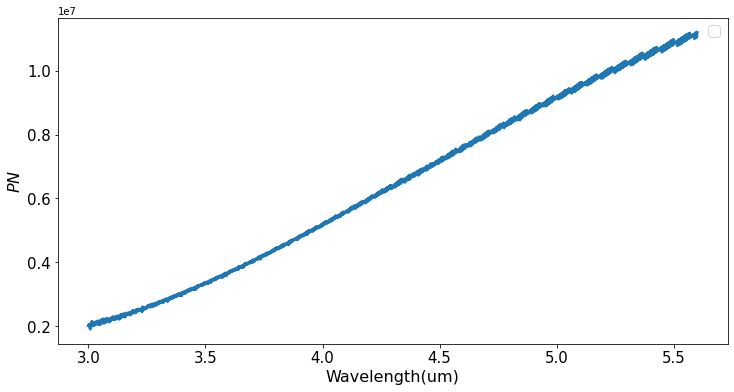

In [1437]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,pn_9e_elt_nogas,linewidth=3,color = '#1f77b4' )
#plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


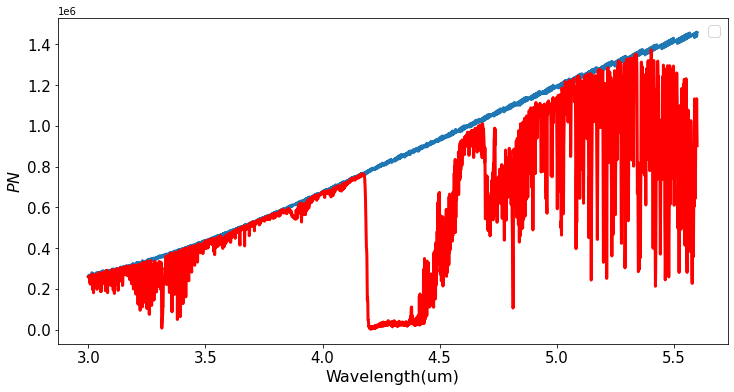

In [857]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,pn_9e_elt_nogas,linewidth=3,color = '#1f77b4' )
plt.plot(wl_um,pn_9e_elt,linewidth=3,color = 'red' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

NameError: name 'ch4_tot_ind' is not defined

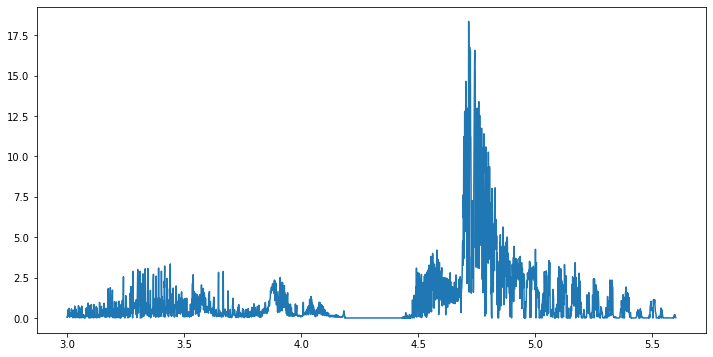

In [585]:
plt.figure(figsize=(12, 6))
plt.plot(wl_um, dn[9] /n_9 )
plt.plot(wl_um[ch4_tot_ind], dn[9][ch4_tot_ind] /n_9[ch4_tot_ind],'o',color = 'red', label ='Data come from SIMBAD',ms=3)
plt.xlim(0.9,5)
plt.ylim(0,50)


In [ ]:
np.sum((dn[9][ch4_tot_ind] /n_9[ch4_tot_ind])**2)**(0.5)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(wl_um, pn_14e_elt /n_14 )
plt.plot(wl_um[result], pn_14e_elt[result] /n_14[result],'o',color = 'red', label ='Data come from SIMBAD',ms=3)

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um[:765],pn_9_elt[:765],linewidth=3,color = 'red' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
flux_bin_the = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(Flux_tbd_planet_earth)):
    for i in range(len(bin_range)):
        flux_bin_the[a].append(np.sum(Flux_tbd_planet_earth[a][bin_range[i]].value))
        
        

In [ ]:
flux_bin_ref = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_ref_planet_earth_fit)):
    for i in range(len(bin_range)):
        flux_bin_ref[a].append(np.sum(f_ref_planet_earth_fit[a][bin_range[i]]))

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_ref[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_the[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,(np.array(flux_bin_the[9])+np.array(flux_bin_ref[9])),linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

## STAR

In [ ]:
pts

In [ ]:
print(pts[["Planet","SNR_total"]].to_latex())

In [ ]:
pts[["Planet","SNR_h2o","SNR_ch4","SNR_co2","SNR_o2","SNR_total"]]
#pts[['Planet','SNR_total']].sort_values(by='SNR_total',ascending=False).to_latex()

In [ ]:
len(f_s[1])

In [ ]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
#AT EARTH
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(absor1.nm[1:1079300]/1000,f_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
#SURFACE
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(f_traAng[9],f_tra1_fum0[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$erg/ s\ cm^2\ A$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:

plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,n_9,linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.ylim(0,0.00006)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

# check contrast form 10-3 to 10-6

In [ ]:
n_9_3=((((pn_9e_elt+2* 10**(-3) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_9_4=((((pn_9e_elt+2* 10**(-4) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_9_6=((((pn_9e_elt+2* 10**(-6) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_9_5=((((pn_9e_elt+2* 10**(-5) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)

In [ ]:
print("SNR(h2o) with instrument contrast 10-3:",np.sum((dn[9][indh2o]/n_9_3[indh2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-4:",np.sum((dn[9][indh2o]/n_9_4[indh2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-5:",np.sum((dn[9][indh2o]/n_9_5[indh2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-6:",np.sum((dn[9][indh2o]/n_9_6[indh2o])**2)**(1/2))

In [ ]:
print("SNR(ch4) with instrument contrast 10-3:",np.sum((dn[9][indch4]/n_9_3[indch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-4:",np.sum((dn[9][indch4]/n_9_4[indch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-5:",np.sum((dn[9][indch4]/n_9_5[indch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-6:",np.sum((dn[9][indch4]/n_9_6[indch4])**2)**(1/2))

In [ ]:
print("SNR(co2) with instrument contrast 10-3:",np.sum((dn[9][indco2]/n_9_3[indco2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-4:",np.sum((dn[9][indco2]/n_9_4[indco2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-5:",np.sum((dn[9][indco2]/n_9_5[indco2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-6:",np.sum((dn[9][indco2]/n_9_6[indco2])**2)**(1/2))

In [ ]:
print("SNR(o2) with instrument contrast 10-3:",np.sum((dn[9][indo2]/n_9_3[indo2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-4:",np.sum((dn[9][indo2]/n_9_4[indo2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-5:",np.sum((dn[9][indo2]/n_9_5[indo2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-6:",np.sum((dn[9][indo2]/n_9_6[indo2])**2)**(1/2))

In [ ]:
print("SNR(total) with instrument contrast 10-3:",np.sum((dn[9][indtotno]/n_9_3[indtotno])**2)**(1/2))
print("SNR(total) with instrument contrast 10-4:",np.sum((dn[9][indtotno]/n_9_4[indtotno])**2)**(1/2))
print("SNR(total) with instrument contrast 10-5:",np.sum((dn[9][indtotno]/n_9_5[indtotno])**2)**(1/2))
print("SNR(total) with instrument contrast 10-6:",np.sum((dn[9][indtotno]/n_9_6[indtotno])**2)**(1/2))

# TRAPPIST-1

In [ ]:
pts

In [ ]:
pts.DistancePC[14]*u.pc

In [ ]:
pts.RadiusEar[14]*u.R_earth

In [ ]:
pts.SMAAU[14]*u.au

In [ ]:
((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)

## Sep

### arctan(a / D)

In [ ]:
np.arctan((pts.SMAAU[14]*u.au/(pts.DistancePC[14]*u.pc)).to(u.m/u.m)).to(u.arcsec)

## Contrast

In [ ]:
((((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)))*0.3

# H

In [ ]:
np.arctan((pts.SMAAU[15]*u.au/(pts.DistancePC[15]*u.pc)).to(u.m/u.m)).to(u.arcsec)

In [ ]:
((((pts.RadiusEar[15]*u.R_earth / (pts.SMAAU[15]*u.au))**2).to(u.m/u.m)))*0.3